In [1]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **1. DATA Wrangling**

## Summary of Dataset

In [2]:
player_df_22 = pd.read_excel('./archive/fifa_2022_datasets/Career_Mode_player_datasets_FIFA_15_22.xlsx')
player_df_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: datetime64[ns](2), float64(17), int64(43), object(48)
memory usage: 13.6+ MB


In [3]:
player_df_22.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,...,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,...,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,...,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,...,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,...,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png


* There are 16155 players with 110 columns.
--------

## Data Wrangling

### Data cleaning

In [4]:
#check if the data set has missing values
player_df_22.isnull().any().sort_values(ascending=0)

mentality_composure     True
club_position           True
release_clause_eur      True
player_tags             True
player_traits           True
                       ...  
skill_fk_accuracy      False
skill_curve            False
skill_dribbling        False
attacking_volleys      False
nation_flag_url        False
Length: 110, dtype: bool

In [5]:
player_df_22.isnull().sum().sort_values(ascending=0)

mentality_composure    16155
release_clause_eur     16155
club_loaned_from       15243
nation_position        15074
nation_logo_url        15074
                       ...  
skill_fk_accuracy          0
skill_curve                0
skill_dribbling            0
attacking_volleys          0
nation_flag_url            0
Length: 110, dtype: int64

<Axes: >

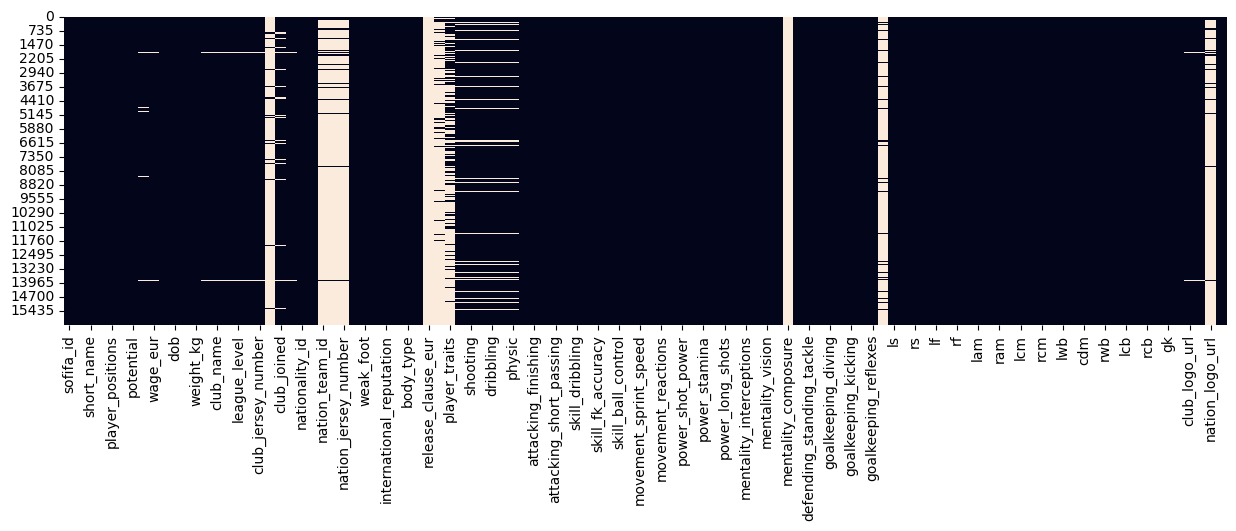

In [6]:
fig, ax = plt.subplots(figsize=(15,4))
sns.heatmap(player_df_22.isnull(), cbar=False)

* if a column lost all or most its data, it would better we drop it from tables as it doesn't help in any way.
* As well as the "url" columns.
* We don't need sofifa_id and real_face as they don't make sense for analysing, but we keep club and national team id because they may represent teams and countries (except their most data are missing).
* player_traits is special, we want to check if it is a influencing factor. We set the null as "no traits" for further analysis processing.

In [7]:
#look into the player traits
player_df_22['player_traits'].fillna('no traits',inplace=True)

In [8]:
#drop sofifa_id, real_face
player_df_22.drop(columns=['sofifa_id','real_face'],inplace=True)

#drop columns that we don't need
player_df_22.drop(columns=player_df_22.filter(regex ='url').columns,inplace=True)

In [9]:
#drop release_clause_eur,mentality_composure,goalkeeping_reflexes
player_df_22.drop(columns=['release_clause_eur','mentality_composure','goalkeeping_reflexes'],inplace=True)


In [10]:
#drop the columns that lose their most data
player_df_22.drop(columns=['club_jersey_number','nation_team_id','player_tags','goalkeeping_speed','club_loaned_from','nation_jersey_number','nation_position'],inplace=True)


In [12]:
#remove DOB as it says the same thing with the Age.
#remove nationality_id as it says the same thing with the nationality.

player_df_22.drop(columns=['dob','nationality_id'],inplace=True)


<Axes: >

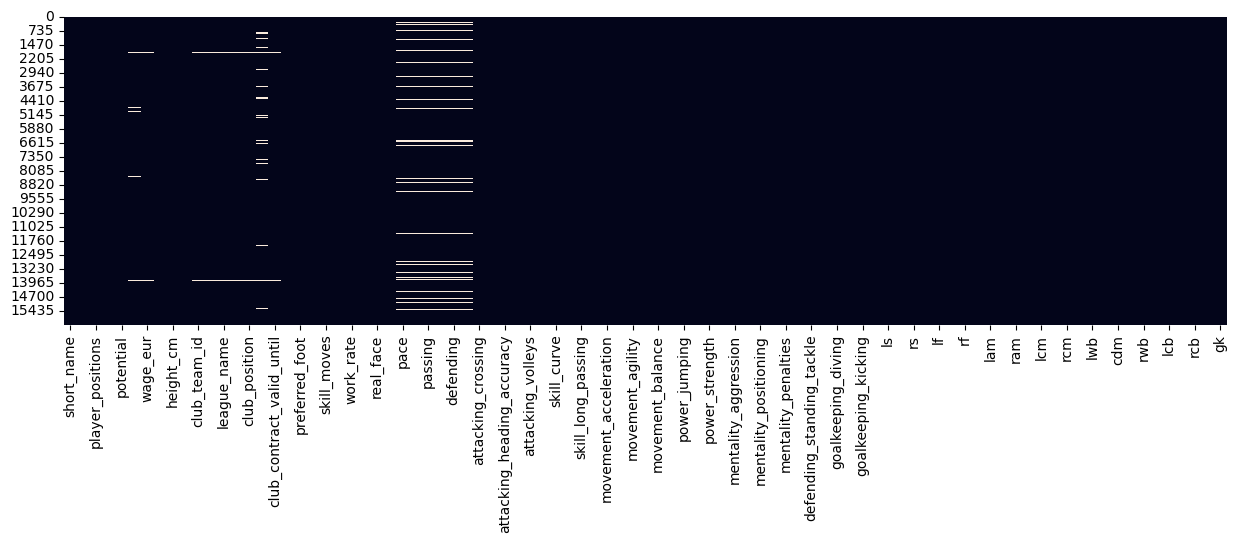

In [13]:
#Let's check the missing value again
fig, ax = plt.subplots(figsize=(15,4))
sns.heatmap(player_df_22.isnull(), cbar=False)

* There are still columns missing values. Are they related to the player_position?

In [14]:
#List the columns missing values
print(
player_df_22[player_df_22['pace'].isna()]['player_positions'].unique(),
player_df_22[player_df_22['passing'].isna()]['player_positions'].unique(),
player_df_22[player_df_22['defending'].isna()]['player_positions'].unique(),
)

['GK'] ['GK'] ['GK']


* Maybe we should remove goalkeep for analysis as the goalkeeps act differently comparing to the others. 

In [ ]:
#remove goalkeeps from the dataset


16155 players have 830 traits

In [ ]:
#drop columns whose name contains 'url', 

## Glimpse the dataset before analysis

### UniUnivariate

In [188]:
# check how many types 
player_df_22.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('<M8[ns]')],
      dtype=object)

#### Numeric Columns

In [203]:
# How many numeric columns
print('There\'re',
player_df_22.dtypes[player_df_22.dtypes == 'int64'].count() +
player_df_22.dtypes[player_df_22.dtypes == 'float64'].count(),
'numeric columns.'
)

There're 52 numeric columns.


* 52 is a large number that we can't handle without a function for generating infomation automatically.
* Would it be better put them in one figure with subplots? Maybe, let's try.

In [15]:
player_df_22.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_contract_valid_until,...,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning
count,16155.000000,16155.000000,1.584400e+04,15916.000000,16155.000000,16155.000000,16155.000000,15916.000000,15916.000000,15916.000000,...,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000
mean,63.830393,68.350108,1.081706e+06,13252.513194,24.776230,181.083627,75.474342,39905.174353,1.378424,2016.958469,...,50.113278,50.765645,49.648344,45.009037,47.656639,45.885918,15.869514,15.511668,15.354875,15.504735
std,7.169896,6.580610,2.842704e+06,23608.922510,4.625321,6.618974,6.891796,52050.202038,0.736796,2.071417,...,16.395071,15.098199,14.552244,17.915206,18.743105,18.145497,17.576799,16.414173,16.010498,16.585081
min,40.000000,40.000000,1.000000e+03,2000.000000,16.000000,155.000000,50.000000,1.000000,1.000000,2014.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000
25%,59.000000,64.000000,1.300000e+05,2000.000000,21.000000,176.000000,70.000000,379.000000,1.000000,2015.000000,...,37.000000,41.000000,39.000000,25.000000,25.000000,25.000000,8.000000,8.000000,8.000000,8.000000
50%,64.000000,68.000000,3.500000e+05,5000.000000,24.000000,181.000000,75.000000,1843.000000,1.000000,2016.000000,...,53.000000,52.000000,50.000000,46.000000,52.000000,49.000000,11.000000,11.000000,11.000000,10.000000
75%,68.000000,73.000000,8.250000e+05,10000.000000,28.000000,186.000000,80.000000,110398.000000,2.000000,2019.000000,...,63.000000,62.000000,61.000000,61.000000,64.000000,62.000000,13.000000,14.000000,13.000000,13.000000
max,93.000000,95.000000,1.005000e+08,550000.000000,44.000000,204.000000,110.000000,113147.000000,4.000000,2021.000000,...,94.000000,96.000000,95.000000,90.000000,91.000000,95.000000,88.000000,87.000000,92.000000,90.000000


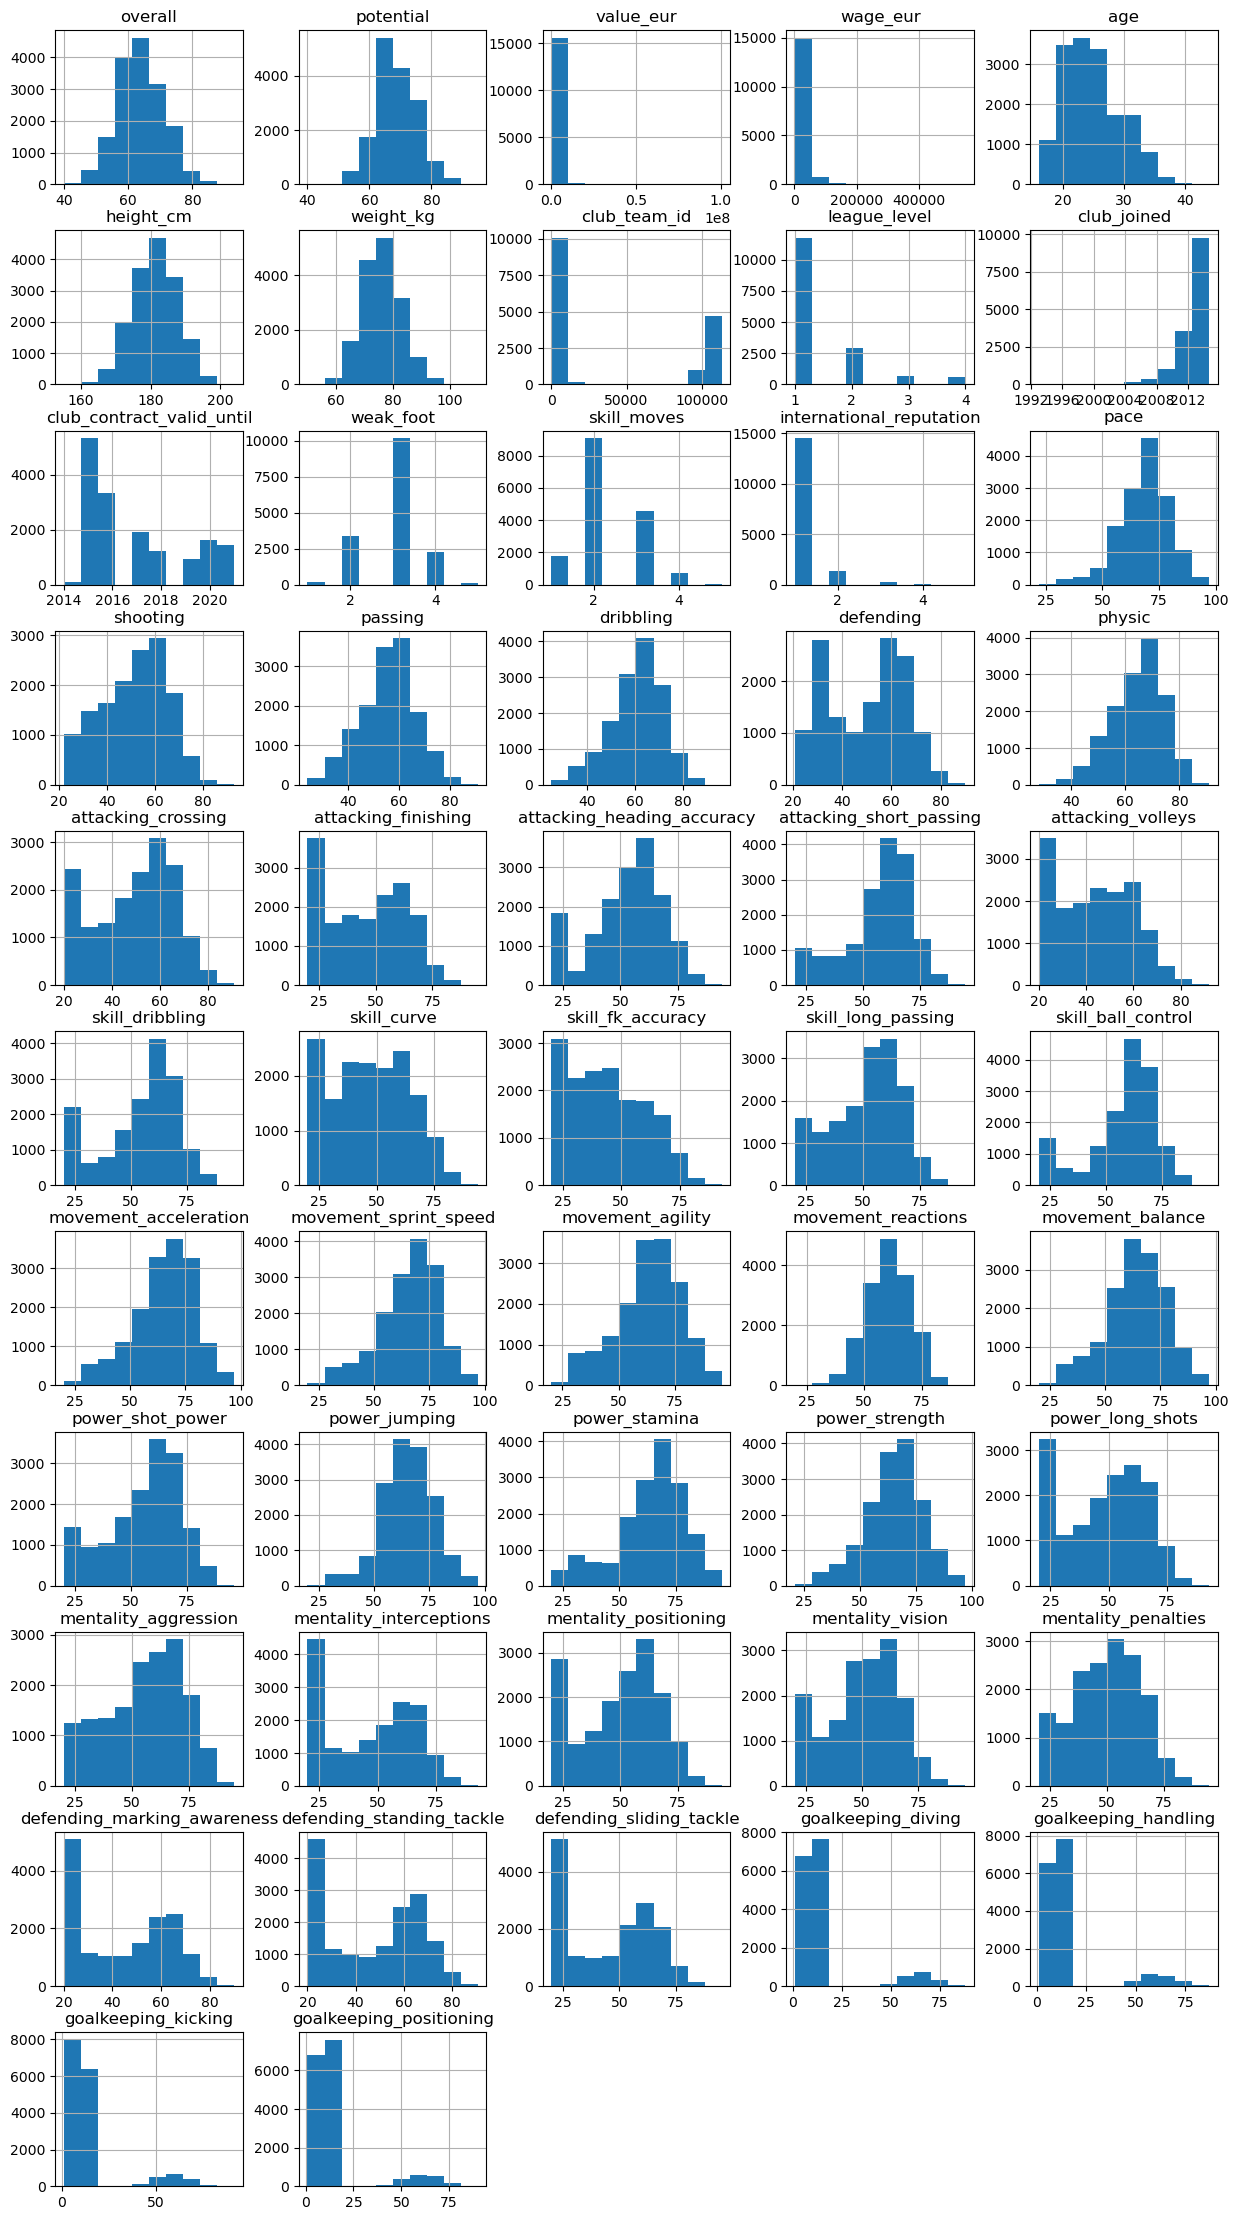

In [20]:
player_df_22.hist(figsize=(15,28),layout=(11,5))
plt.show()

#### Object Columns

In [23]:
player_df_22.dtypes[player_df_22.dtypes=='object']

short_name          object
long_name           object
player_positions    object
club_name           object
league_name         object
club_position       object
nationality_name    object
preferred_foot      object
work_rate           object
body_type           object
real_face           object
player_traits       object
ls                  object
st                  object
rs                  object
lw                  object
lf                  object
cf                  object
rf                  object
rw                  object
lam                 object
cam                 object
ram                 object
lm                  object
lcm                 object
cm                  object
rcm                 object
rm                  object
lwb                 object
ldm                 object
cdm                 object
rdm                 object
rwb                 object
lb                  object
lcb                 object
cb                  object
rcb                 object
r

In [45]:
#Look at the player_positions
player_df_22['player_positions'].unique()

array(['CF', 'LW, LM', 'RM, LM, RW', 'ST', 'GK', 'CM, LW', 'ST, CF',
       'CM, CDM', 'LM', 'LM, RM', 'CDM, RB, CM', 'CB', 'LM, CAM',
       'RM, RW', 'CM', 'ST, CF, CAM', 'CAM, LW', 'CAM, CM, RM',
       'LM, RM, ST, CAM', 'RM, CAM, ST, LM', 'LW', 'CAM, RW',
       'CB, CDM, CM', 'CAM, RM', 'ST, RW', 'CM, CDM, CAM', 'CB, RB',
       'CDM, CM', 'CAM, CF, CM, RM', 'CDM', 'CAM, CM, LM', 'LM, RM, CAM',
       'LM, CAM, RM', 'CM, CAM', 'RW, ST', 'CB, CDM', 'RB', 'RM',
       'CAM, CM', 'RW', 'CAM, LM, CM', 'RW, ST, RM', 'LW, RW', 'RM, LM',
       'CAM, CM, LM, CDM', 'LW, CAM', 'CAM, LM, RM', 'LW, ST', 'LB',
       'RW, CAM, ST', 'CAM', 'CB, LB', 'CB, RB, LB', 'RM, CAM', 'CAM, LM',
       'LM, RM, CM', 'LB, CM, CDM, LM', 'RW, RM', 'ST, CAM',
       'CAM, CF, CM', 'CF, CAM, ST', 'CM, CAM, CDM', 'ST, CF, LW, RW',
       'RB, CB', 'CAM, LW, CM', 'CM, CDM, LM', 'CAM, CF', 'CF, ST',
       'RW, LW', 'LB, LM', 'CB, LB, LM', 'ST, LW, LM', 'CF, ST, CAM',
       'CM, RM, RB, CF', 'RM, RWB', 'CM, CA

* It's complicated as one player can have multiple positions.

In [46]:
#Look at the club_position
player_df_22['club_position'].unique()

array(['CF', 'LW', 'SUB', 'ST', 'GK', 'LCM', 'RES', 'RS', 'LM', 'RCM',
       'LCB', 'CAM', 'RW', 'LS', 'LDM', 'RCB', 'CB', 'CDM', 'CM', 'RDM',
       'RB', 'RM', 'LB', nan, 'RAM', 'LAM', 'RWB', 'RF', 'LF', 'LWB'],
      dtype=object)

* We only look at the position of XI

In [147]:
 club_pos = player_df_22.loc[
    (player_df_22['club_position']!='RES') & 
    (player_df_22['club_position']!='SUB') & 
    (player_df_22['club_position'].notna())]

In [150]:
total =club_pos['club_position'].count()
total

6347

In [151]:
pos=[]
perc_pos=[]
for p in club_pos['club_position'].unique():
    num_of_pos = club_pos[club_pos['club_position'] == p]['club_position'].count()
    pos.append(p)
    perc_pos.append(((num_of_pos/total)*100).round(2))


In [84]:
player_df_22[player_df_22['club_position'] == 'CF']['club_position'].count()

10